In [650]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras
import h5py
import requests
import os

In [651]:
# Reading finalized datasets
US_data = pd.read_csv(r"C:\Users\akama\OneDrive\Desktop\Data Science Bootcamp\IshMe\Capstone 3 - Time Series Analysis\raw_data\US_data.csv")
CO_emissions = pd.read_csv(r"C:\Users\akama\OneDrive\Desktop\Data Science Bootcamp\IshMe\Capstone 3 - Time Series Analysis\raw_data\CO_emissions.csv")

## Dataset 2 - Preprocessing and Modeling

In [652]:
df2 = CO_emissions.copy()

In [653]:
df2.head()

,year,co2,co2_growth_abs,share_global_co2,coal_co2,cement_co2,gas_co2,oil_co2,co2_per_capita,coal_co2_per_capita,cement_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,flaring_co2_per_capita,share_global_coal_co2,share_global_cement_co2,share_global_gas_co2,share_global_oil_co2,population,gdp
0,1900-01-01,664.123,38.590,33.99,626.544,1.386,11.542,24.651,8.432,7.955,0.018,0.146,0.313,0.129,33.45,100.0,100.00,36.50,78763706.0,6.139981e+11
1,1901-01-01,723.182,59.059,35.83,681.541,1.656,12.861,27.125,9.002,8.484,0.021,0.160,0.338,0.129,35.33,100.0,100.00,36.17,80336086.0,6.831060e+11
2,1902-01-01,766.638,43.456,37.04,715.931,2.145,13.692,34.870,9.355,8.736,0.026,0.167,0.426,0.131,36.29,100.0,99.97,43.03,81949920.0,6.901269e+11
3,1903-01-01,896.937,130.299,39.71,840.042,2.533,14.524,39.839,10.728,10.048,0.030,0.174,0.476,0.141,38.97,100.0,99.97,46.44,83606240.0,7.237664e+11
4,1904-01-01,882.953,-13.984,38.68,818.270,2.732,15.162,46.789,10.352,9.593,0.032,0.178,0.548,0.142,37.73,100.0,99.98,48.58,85296008.0,7.146219e+11


In [654]:
df2.shape

(120, 20)

In [655]:
df2["year"] = pd.to_datetime(df2["year"])

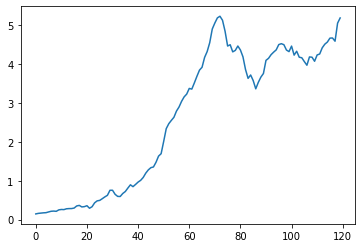

In [656]:
plt.plot(df2["gas_co2_per_capita"])

In [657]:
df2.head()

,year,co2,co2_growth_abs,share_global_co2,coal_co2,cement_co2,gas_co2,oil_co2,co2_per_capita,coal_co2_per_capita,cement_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,flaring_co2_per_capita,share_global_coal_co2,share_global_cement_co2,share_global_gas_co2,share_global_oil_co2,population,gdp
0,1900-01-01,664.123,38.590,33.99,626.544,1.386,11.542,24.651,8.432,7.955,0.018,0.146,0.313,0.129,33.45,100.0,100.00,36.50,78763706.0,6.139981e+11
1,1901-01-01,723.182,59.059,35.83,681.541,1.656,12.861,27.125,9.002,8.484,0.021,0.160,0.338,0.129,35.33,100.0,100.00,36.17,80336086.0,6.831060e+11
2,1902-01-01,766.638,43.456,37.04,715.931,2.145,13.692,34.870,9.355,8.736,0.026,0.167,0.426,0.131,36.29,100.0,99.97,43.03,81949920.0,6.901269e+11
3,1903-01-01,896.937,130.299,39.71,840.042,2.533,14.524,39.839,10.728,10.048,0.030,0.174,0.476,0.141,38.97,100.0,99.97,46.44,83606240.0,7.237664e+11
4,1904-01-01,882.953,-13.984,38.68,818.270,2.732,15.162,46.789,10.352,9.593,0.032,0.178,0.548,0.142,37.73,100.0,99.98,48.58,85296008.0,7.146219e+11


In [658]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(df2['gas_co2_per_capita'].values.reshape(-1, 1))

In [659]:
dataset[0:10]

array([[0.        ],
       [0.0027532 ],
       [0.00412979],
       [0.00550639],
       [0.00629302],
       [0.0100295 ],
       [0.01337266],
       [0.01435595],
       [0.01317601],
       [0.02045231]])

In [660]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

84 36


In [661]:
print(len(df2))
print(84 + 36)

120
120


In [662]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=15):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [663]:
x_train, y_train = create_dataset(train, look_back=15)
x_test, y_test = create_dataset(test, look_back=15)

In [664]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(68, 15)
(68,)
(20, 15)
(20,)


In [665]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [666]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(68, 1, 15)
(68,)
(20, 1, 15)
(20,)


In [667]:
# create and fit the LSTM network
look_back = 15
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
68/68 - 0s - loss: 0.1686
Epoch 2/20
68/68 - 0s - loss: 0.0120
Epoch 3/20
68/68 - 0s - loss: 0.0077
Epoch 4/20
68/68 - 0s - loss: 0.0072
Epoch 5/20
68/68 - 0s - loss: 0.0064
Epoch 6/20
68/68 - 0s - loss: 0.0053
Epoch 7/20
68/68 - 0s - loss: 0.0056
Epoch 8/20
68/68 - 0s - loss: 0.0043
Epoch 9/20
68/68 - 0s - loss: 0.0040
Epoch 10/20
68/68 - 0s - loss: 0.0035
Epoch 11/20
68/68 - 0s - loss: 0.0030
Epoch 12/20
68/68 - 0s - loss: 0.0027
Epoch 13/20
68/68 - 0s - loss: 0.0021
Epoch 14/20
68/68 - 0s - loss: 0.0025
Epoch 15/20
68/68 - 0s - loss: 0.0018
Epoch 16/20
68/68 - 0s - loss: 0.0020
Epoch 17/20
68/68 - 0s - loss: 0.0018
Epoch 18/20
68/68 - 0s - loss: 0.0018
Epoch 19/20
68/68 - 0s - loss: 0.0017
Epoch 20/20
68/68 - 0s - loss: 0.0014


In [668]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 20)                2880      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 21        
Total params: 2,901
Trainable params: 2,901
Non-trainable params: 0
_________________________________________________________________


In [669]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.18 RMSE
Test Score: 0.20 RMSE


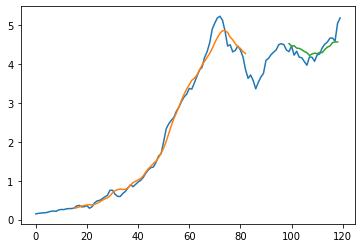

In [670]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(min_max_scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()